In [2]:
from langgraph.graph import StateGraph, START, END
from langchain_openai import ChatOpenAI
from typing import TypedDict
from dotenv import load_dotenv

In [3]:
load_dotenv()

True

In [4]:
model=ChatOpenAI()

In [39]:
class BlogState(TypedDict):

    title:str
    outline:str
    content:str
    score:int


In [18]:
def create_outline(state:BlogState)->BlogState:

    # fetch title
    title=state['title']

    #call llm gen outline
    prompt=f"Generate a detailed outline for a blog on the topic - {title}"
    outline=model.invoke(prompt).content

    # update state
    state['outline']=outline

    return state

In [19]:
def create_blog(state:BlogState)->BlogState:

    title=state['title']
    outline=state['outline']

    prompt=f"Write a detailed blog on the title - {title} using the following outline \n {outline}"

    content=model.invoke(prompt).content

    state['content']=content

    return state


In [58]:
def evaluate(state:BlogState)->BlogState:

    title=state['title']
    outline=state['outline']
    content=state['content']

    prompt=f"Evaluate the content - {content} using the following outline \n {outline} in numeric between 0-100 and return only number"

    result=model.invoke(prompt).content

    state['score']=result

    return state


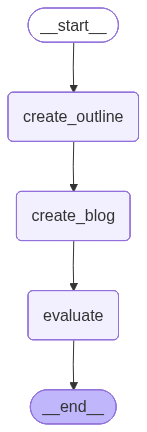

In [59]:
graph=StateGraph(BlogState)

# nodes
graph.add_node('create_outline',create_outline)
graph.add_node('create_blog',create_blog)
graph.add_node('evaluate',evaluate)

# edges
graph.add_edge(START,'create_outline')
graph.add_edge('create_outline','create_blog')
graph.add_edge('create_blog','evaluate')
graph.add_edge('evaluate',END)

graph.compile()

In [60]:
workflow=graph.compile()

In [61]:
intial_state={'title':'Rise of AI in India'}
final_state=workflow.invoke(intial_state)
print(final_state['content'])

I. Introduction

A. Artificial Intelligence (AI) refers to the simulation of human intelligence processes by machines, primarily computer systems. This includes learning, reasoning, problem-solving, perception, and language understanding. 

B. Currently, AI is being used in various sectors in India such as healthcare, finance, retail, agriculture, and more. 

C. The rise of AI in India is transforming industries and impacting the economy in significant ways. This blog will explore the historical context, current landscape, challenges, opportunities, impact, future outlook, and conclusion of AI in India.

II. Historical Context

A. Globally, the development of AI can be traced back to the 1950s and has seen significant advancements over the years.

B. In India, the introduction of AI began in the 1980s and has since grown steadily.

C. Major milestones in the rise of AI in India include the establishment of research institutions like the Indian Council of Scientific and Industrial Resea

In [50]:
final_state['outline']

'I. Introduction\n    A. Brief overview of artificial intelligence (AI)\n    B. Introduction to the rise of AI in India\n    C. Importance and impact of AI in various sectors in India\n\nII. Historical Perspective of AI in India\n    A. Overview of the evolution of AI in India\n    B. Key milestones and developments in the field of AI in India\n    C. Major contributors and institutions advancing AI research in India\n\nIII. Current Scenario of AI in India\n    A. Overview of the current state of AI adoption in India\n    B. Key industries and sectors leveraging AI technology in India\n    C. Success stories and case studies of AI implementation in India\n\nIV. Challenges and Opportunities in the AI Sector in India\n    A. Key challenges faced by the AI industry in India\n    B. Opportunities for growth and expansion in the AI sector in India\n    C. Government initiatives and policies supporting AI development in India\n\nV. Future Outlook of AI in India\n    A. Predictions and trends

In [51]:
final_state['title']

'Rise of AI in India'

In [62]:
number=final_state['score']
print(int(number))

90
